In [1]:
import pandas as pd
import os

# Create directory for Tableau files
os.makedirs('tableau_dashboard', exist_ok=True)

# 1. Top Rated Movies Data
top_movies = pd.DataFrame({
    'title': ['The Shawshank Redemption', 'The Godfather', "Schindler's List", 
              'The Godfather Part II', '12 Angry Men', "Gabriel's Inferno",
              "Gabriel's Inferno: Part II", 'The Green Mile', 'The Dark Knight', 'Pulp Fiction'],
    'genres': ['Drama, Crime', 'Drama, Crime', 'Drama, History, War',
               'Drama, Crime', 'Drama', 'Romance',
               'Romance', 'Fantasy, Drama, Crime', 'Drama, Action, Crime, Thriller', 'Thriller, Crime'],
    'vote_average': [9.3, 9.2, 8.9, 9.0, 8.9, 9.1, 9.0, 8.5, 9.0, 8.9]
})
top_movies.to_csv('tableau_dashboard/top_rated_movies.csv', index=False)

# 2. Trending TV Shows Data
trending_tv = pd.DataFrame({
    'name': ['House of the Dragon', 'The Lord of the Rings: The Rings of Power', 
             'She-Hulk: Attorney at Law', 'Pantheon', 'Andor'],
    'tagline': ['Journey to Middle-earth.', 'Fire and blood.', 
                "You'll like her when she's angry.", 'Dream the world anew.', 
                'A new vision of the future.']
})
trending_tv.to_csv('tableau_dashboard/trending_tv_shows.csv', index=False)

# 3. Popular Actors Data
actors = pd.DataFrame({
    'name': ['Tom Holland', 'Alia Bhatt'],
    'birthplace': ['Surrey, England, UK', 'Mumbai, Maharashtra, India'],
    'instagram_id': ['tomholland2013', 'aliaabhatt'],
    'twitter_id': ['TomHolland1996', 'Aliaa08']
})
actors.to_csv('tableau_dashboard/popular_actors.csv', index=False)

# 4. Movie Characters Data
characters = pd.DataFrame({
    'movie': ['Top Gun', 'Mission: Impossible - Fallout', 'Minority Report', 'Edge of Tomorrow'],
    'character': ["Lt. Pete 'Maverick' Mitchell", 'Ethan Hunt', 
                  'Chief John Anderton', "Maj. William 'Bill' Cage"]
})
characters.to_csv('tableau_dashboard/movie_characters.csv', index=False)

# 5. TV Show Details Data
tv_details = pd.DataFrame({
    'show': ['Friends', 'The Big Bang Theory', 'Money Heist'],
    'detail_type': ['overview', 'episode', 'cast_gender'],
    'detail_value': ["Six young people from New York City...", 
                     "S06E05: The Holographic Excitation (2012-10-25)",
                     "Male: 5, Female: 10"]
})
tv_details.to_csv('tableau_dashboard/tv_show_details.csv', index=False)

print("Tableau CSV files created in 'tableau_dashboard' directory")

Tableau CSV files created in 'tableau_dashboard' directory


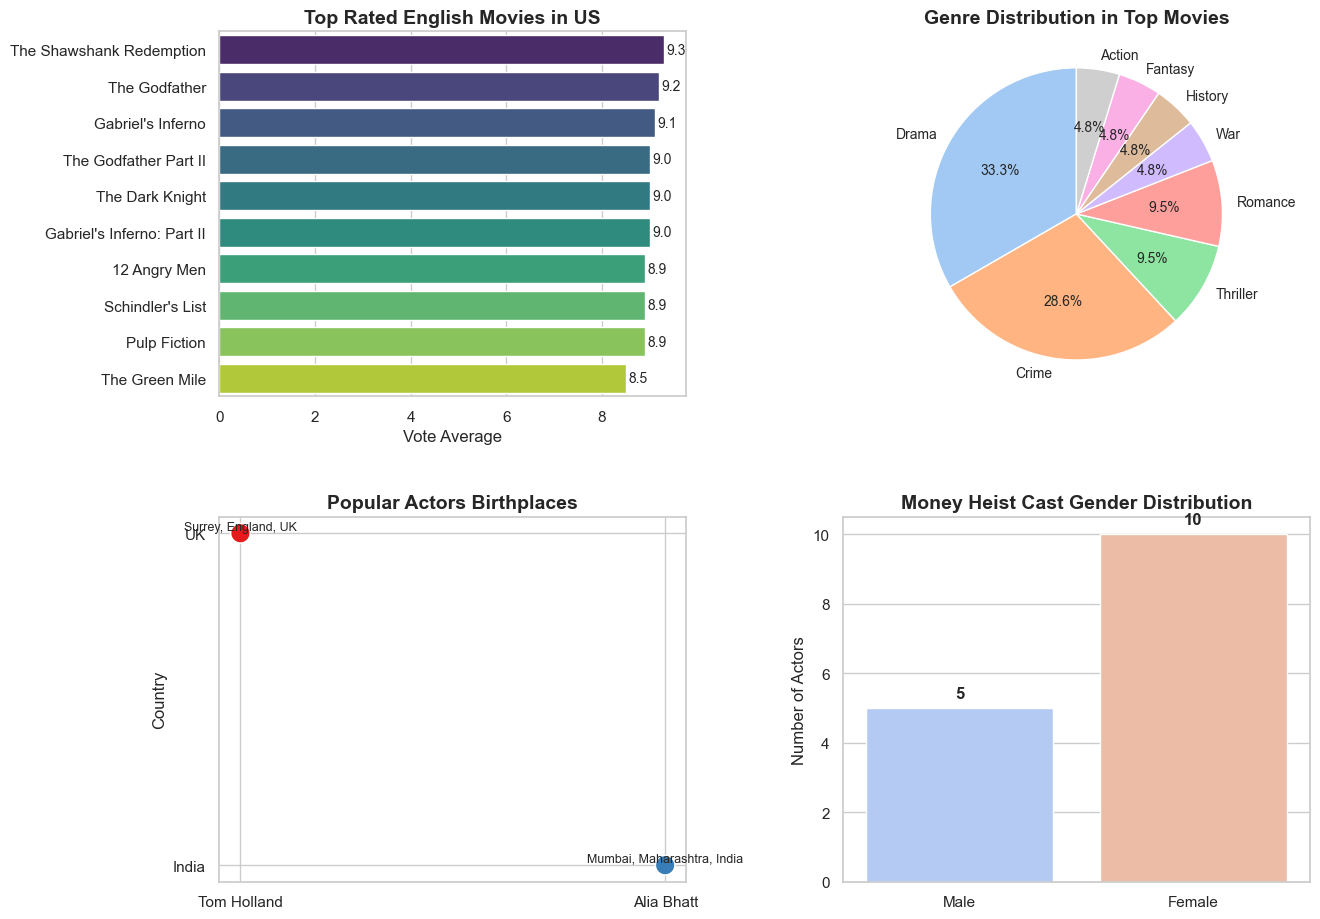

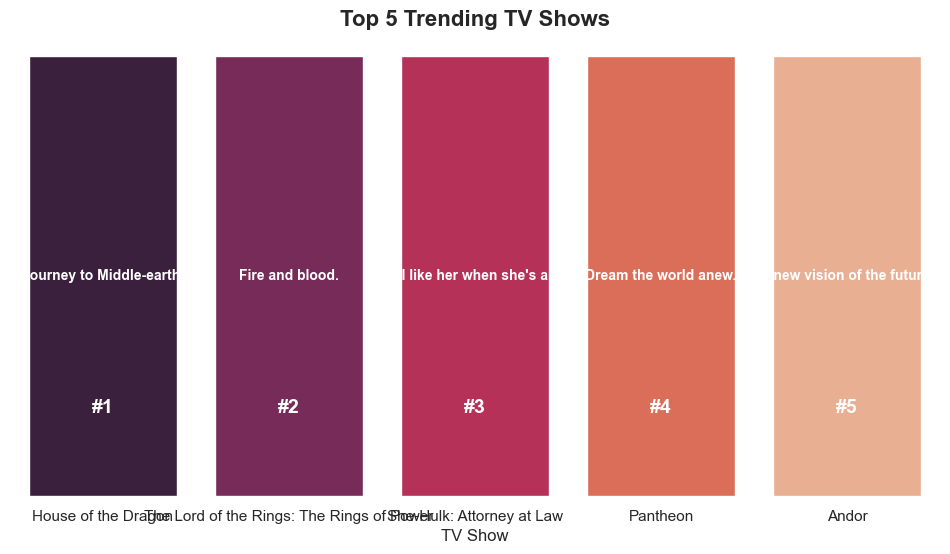

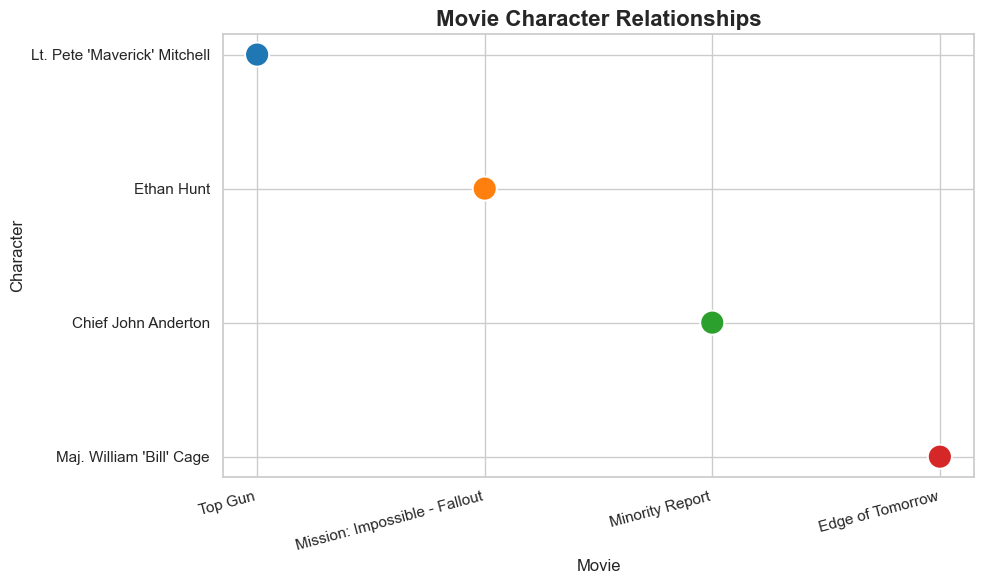

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# 1. Top Rated Movies Visualization (Fixed)
plt.subplot(2, 2, 1)
top_movies = pd.read_csv('tableau_dashboard/top_rated_movies.csv')
top_movies_sorted = top_movies.sort_values('vote_average', ascending=False)
ax = sns.barplot(
    x='vote_average', 
    y='title', 
    data=top_movies_sorted, 
    hue='title',  # Added hue to fix warning
    palette='viridis',
    legend=False
)
plt.title('Top Rated English Movies in US', fontsize=14, fontweight='bold')
plt.xlabel('Vote Average', fontsize=12)
plt.ylabel('')
# Add data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.05, p.get_y() + p.get_height()/2, f'{width:.1f}', 
             ha='left', va='center', fontsize=10)

# 2. Genres Distribution
plt.subplot(2, 2, 2)
genre_counts = top_movies['genres'].str.split(', ').explode().value_counts()
colors = sns.color_palette('pastel', len(genre_counts))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title('Genre Distribution in Top Movies', fontsize=14, fontweight='bold')

# 3. Actors Visualization
plt.subplot(2, 2, 3)
actors = pd.read_csv('tableau_dashboard/popular_actors.csv')
# Extract country from birthplace
actors['country'] = actors['birthplace'].apply(lambda x: x.split(',')[-1].strip())
sns.scatterplot(
    x='name', 
    y='country', 
    data=actors, 
    s=200, 
    hue='name', 
    palette='Set1', 
    legend=False
)
plt.title('Popular Actors Birthplaces', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Country', fontsize=12)
# Add birthplace annotations
for i, row in actors.iterrows():
    plt.text(i, row['country'], row['birthplace'], 
             fontsize=9, ha='center', va='bottom')

# 4. TV Show Gender Distribution (Fixed)
plt.subplot(2, 2, 4)
money_heist = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [5, 10]
})
sns.barplot(
    x='Gender', 
    y='Count', 
    data=money_heist, 
    hue='Gender',  # Added hue to fix warning
    palette='coolwarm',
    legend=False
)
plt.title('Money Heist Cast Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Actors', fontsize=12)
# Add count labels
for i, count in enumerate(money_heist['Count']):
    plt.text(i, count + 0.2, str(count), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

# 5. Trending TV Shows Visualization - Fixed
trending_tv = pd.read_csv('tableau_dashboard/trending_tv_shows.csv')
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='name', 
    y=[1]*5, 
    data=trending_tv, 
    hue='name',  # Added hue
    palette='rocket', 
    legend=False
)
plt.title('Top 5 Trending TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('TV Show', fontsize=12)
plt.ylabel('')
plt.yticks([])
# Add tagline annotations
for i, tagline in enumerate(trending_tv['tagline']):
    ax.text(i, 0.5, tagline, ha='center', va='center', 
            fontsize=10, rotation=0, color='white', fontweight='bold')
# Add ranking labels
for i in range(5):
    ax.text(i, 0.2, f'#{i+1}', ha='center', va='center', 
            fontsize=14, color='white', fontweight='bold')
sns.despine(left=True, bottom=True)
plt.show()

# 6. Bonus: Movie-Character Relationships
plt.figure(figsize=(10, 6))
characters = pd.read_csv('tableau_dashboard/movie_characters.csv')

# Create a simple relationship plot
sns.scatterplot(
    x='movie', 
    y='character', 
    data=characters,
    s=300,
    hue='movie',
    palette='tab10',
    legend=False
)

# Add connecting lines
for _, row in characters.iterrows():
    plt.plot(
        [row['movie'], row['movie']],
        [row['character'], row['character']],
        'k-',
        alpha=0.3,
        lw=1
    )

plt.title('Movie Character Relationships', fontsize=16, fontweight='bold')
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Character', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()